# ensemble

## - 2

In [26]:
import pandas as pd
import numpy as np

ensemble_file_01_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/LGBM_regressor.csv'
ensemble_file_02_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_classifier.csv'


file_01 = pd.read_csv(ensemble_file_01_path)
file_02 = pd.read_csv(ensemble_file_02_path)


# 두 개의 DataFrame을 병합하여 앙상블
ensemble_df = pd.merge(file_01, file_02, on='id', suffixes=['_1', '_2'])

# 앙상블 예측 생성
ensemble_df['prediction'] = round((ensemble_df['prediction_1'] + ensemble_df['prediction_2']) / 2, 8)
ensemble_df['prediction'] = np.clip(ensemble_df['prediction'], 0, 1)


ensemble_df[['id', 'prediction']].to_csv('lgbm-catboost_classifier.csv', index=False)

In [ ]:
0.7 / 0.2 / 0.1

In [ ]:
0.1/0.2/0.1/0.6

In [20]:
import pandas as pd
import numpy as np

ensemble_file_01_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_classifier.csv'
ensemble_file_02_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_regressor_clip.csv'
ensemble_file_03_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/lstm+kfold.csv'
ensemble_file_04_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/saint+kfold.csv'



# CSV 파일 로드
df_01 = pd.read_csv(ensemble_file_01_path)
df_02 = pd.read_csv(ensemble_file_02_path)
df_03 = pd.read_csv(ensemble_file_03_path)
df_04 = pd.read_csv(ensemble_file_04_path)



# 앙상블을 위한 예측값 합치기
ensemble_df = pd.DataFrame()
ensemble_df['id'] = df_01['id']
ensemble_df['prediction'] = round((df_01['prediction'] * 0.1 + df_02['prediction'] * 0.2 + df_03['prediction'] * 0.1
                                   + df_04['prediction'] * 0.6), 8)

print(ensemble_df)
ensemble_df['prediction'] = np.clip(ensemble_df['prediction'], 0, 1)

# 앙상블 결과 출력
ensemble_result_path = 'saint+kfold-catboost_regressor-classifier_1216.csv'
ensemble_df.to_csv(ensemble_result_path, index=False)

      id  prediction
0      0    0.699048
1      1    0.903159
2      2    0.167448
3      3    0.825454
4      4    0.226576
..   ...         ...
739  739    0.051169
740  740    0.792232
741  741    0.854012
742  742    0.727755
743  743    0.626791

[744 rows x 2 columns]


## -3

In [12]:
import pandas as pd
import numpy as np

ensemble_file_01_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/saint+kfold.csv'
ensemble_file_02_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_regressor.csv'
ensemble_file_03_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/lstm+kfold.csv'

# CSV 파일 로드
df_01 = pd.read_csv(ensemble_file_01_path)
df_02 = pd.read_csv(ensemble_file_02_path)
df_03 = pd.read_csv(ensemble_file_03_path)

# 앙상블을 위한 예측값 합치기
ensemble_df = pd.DataFrame()
ensemble_df['id'] = df_01['id']
ensemble_df['prediction'] = round((df_01['prediction'] + df_02['prediction'] + df_03['prediction']) / 3, 8)
ensemble_df['prediction'] = np.clip(ensemble_df['prediction'], 0, 1)

# 앙상블 결과 출력
ensemble_result_path = 'saint+kfold-catboost_regressor-lstm.csv'
ensemble_df.to_csv(ensemble_result_path, index=False)

## -4

In [3]:
import pandas as pd
import numpy as np

ensemble_file_01_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/saint+kfold.csv'
ensemble_file_02_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_regressor.csv'
ensemble_file_03_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_classifier.csv'
ensemble_file_04_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/lstm+kfold.csv'

# CSV 파일 로드
df_01 = pd.read_csv(ensemble_file_01_path)
df_02 = pd.read_csv(ensemble_file_02_path)
df_03 = pd.read_csv(ensemble_file_03_path)
df_04 = pd.read_csv(ensemble_file_04_path)

# 앙상블을 위한 예측값 합치기
ensemble_df = pd.DataFrame()
ensemble_df['id'] = df_01['id']
ensemble_df['prediction'] = round((df_01['prediction'] + df_02['prediction']
                                   + df_03['prediction'] + df_04['prediction']) / 4, 8)
ensemble_df['prediction'] = np.clip(ensemble_df['prediction'], 0, 1)

# 앙상블 결과 출력
ensemble_result_path = 'saint+-catboost_regressor_classifier_lstm.csv'
ensemble_df.to_csv(ensemble_result_path, index=False)

In [6]:
import pandas as pd
import numpy as np

ensemble_file_01_path = '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/origin/catboost_regressor.csv'
df_01 = pd.read_csv(ensemble_file_01_path)
ensemble_df = pd.DataFrame()
ensemble_df['id'] = df_01['id']
ensemble_df['prediction'] =df_01['prediction']
ensemble_df['prediction'] = np.clip(ensemble_df['prediction'], 0, 1)

ensemble_result_path = 'catboost_regressor_clip.csv'
ensemble_df.to_csv(ensemble_result_path, index=False)


## hard voting

In [7]:
import pandas as pd
import numpy as np
import os
import glob

In [8]:
output_csv = list()
for file_dir in glob.glob("./voting/*.csv"):
    print(f"Loading... {file_dir}")
    df = pd.read_csv(file_dir)
    output_csv.append(df[["prediction"]])

Loading... ./voting/catboost_classifier.csv
Loading... ./voting/catboost_regressor_clip.csv
Loading... ./voting/saint+kfold.csv


In [9]:
output_sum = list()
for df in output_csv:
    output_sum.append(list(df["prediction"].iloc[:744].values))

In [10]:
'''
    voting ensemble
    prob > 0.5 -> 1
    prob < 0.5 -> 0
    1의 수와 0의 수를 비교해서 더 많은 개수의 값들만 평균을 취함
'''

output_np = np.array(output_sum).T

row_len = len(output_np[0])
#print(row_len)

result = []

for row in output_np[:]:
    ans = np.where(row > 0.5,1,0) # voting
    if ans.sum() > row_len//2:
        value = np.average(row[np.where(ans == 1)]) # 1의 개수가 더 많으면 0.5 보다 큰 prob를 평균
    elif ans.sum() < row_len//2:
        value = np.average(row[np.where(ans == 0)]) # 0의 개수가 더 많으면 0.5 보다 작은 prob 평균
    else:
        value = np.average(row) # 동일한 경우 전체 평균
    
    result.append(value)
df['prediction'] = result
print ("Ensemble Done. Check ./ensemble_submission.csv")

Ensemble Done. Check ./ensemble_submission.csv


In [11]:
sum_res = np.sum(output_sum, axis=0) / len(output_csv)

df = pd.DataFrame()
df["prediction"] = sum_res
#df.to_csv("./ensemble_result/ensemble_submission.csv", index_label="id")
print ("Ensemble Done. Check ./ensemble_submission.csv")
df.to_csv("./ensemble_submission.csv", index_label="id")

Ensemble Done. Check ./ensemble_submission.csv


# subplot

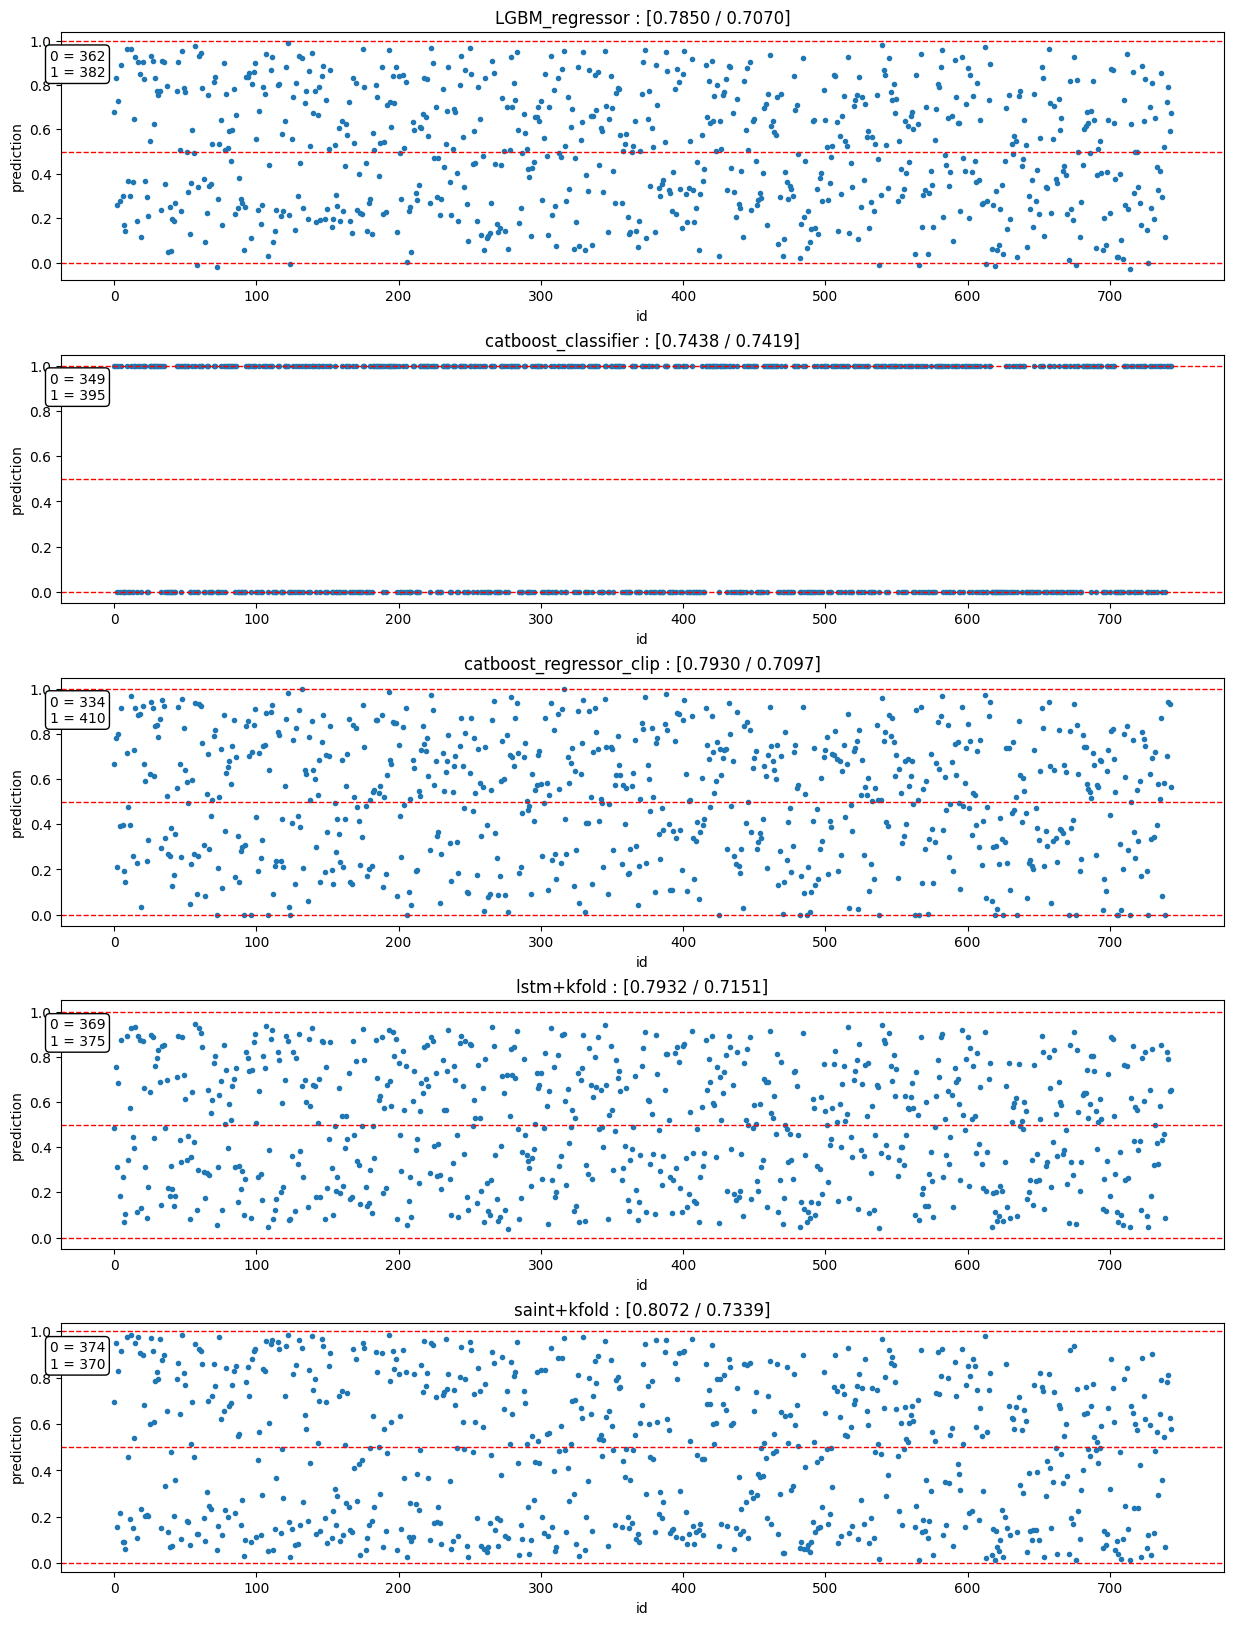

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_files = [
    '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/origin/LGBM_regressor.csv',
    '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/origin/catboost_classifier.csv',
    '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/origin/catboost_regressor_clip.csv',
    '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/origin/lstm+kfold.csv',
    '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/origin/saint+kfold.csv',

    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/sumbit/catboost_regressor_classifier.csv',
    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/sumbit/saint+kfold-catboost_classifier.csv',
    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/sumbit/saint+kfold-catboost_regressor.csv',

    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/final/lgbm-catboost_classifier.csv',
    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/final/saint+kfold-catboost_regressor-catboost_classifier.csv',
    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/saint+kfold-catboost_regressor-classifier_721.csv',
    # '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/final/saint+kfold-catboost_regressor-LGBM_Regressor.csv',
]

result = [
    '[0.7850 / 0.7070]',
    '[0.7438 / 0.7419]',
    '[0.7930 / 0.7097]',
    '[0.7932 / 0.7151]',
    '[0.8072 / 0.7339]',

    '[0.7951 / 0.7419]',
    '[0.8122 / 0.7419]',
    '[0.8116 / 0.7473]',

    '[None]',
    '[0.8133 / 0.7419]',
    '[None]',
    '[0.8067 / 0.7312]',


]

# 개수를 저장할 리스트
category_counts = []

# CSV 파일 읽어오고 범주별 개수 계산
for file_path in csv_files:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 0.5를 기준으로 1과 0으로 분류하여 개수 계산
    counts = df['prediction'].apply(lambda x: 1 if x >= 0.5 else 0).value_counts()
    
    # 개수를 리스트에 추가
    category_counts.append(counts)

# 시각화
labels = ['0', '1']
colors = ['lightblue', 'lightgreen']



# Subplot 설정
fig, axs = plt.subplots(len(csv_files), 1, figsize=(15, 20), sharex=False, gridspec_kw={'hspace': 0.3})

# CSV 파일 읽어오고 subplot 그리기
for i, file_path in enumerate(csv_files):
    name = file_path.split('/')[-1].replace('.csv','')
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Subplot 위치 설정
    ax = axs[i]
    
    # Subplot 그리기
    ax.plot(df['id'], df['prediction'], marker='o', markersize=3, linestyle='None')
    
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

    ax.set_title(f'{name} : {result[i]}')
    ax.set_xlabel('id')
    ax.set_ylabel('prediction')

    # 텍스트로 0과 1의 값을 표시
    count_0 = len(df[df['prediction'] <= 0.5])
    count_1 = len(df[df['prediction'] > 0.5])
    ax.text(-0.01, 0.93, f'0 = {count_0}\n1 = {count_1}', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# 그래프 출력
#plt.tight_layout()
plt.show()


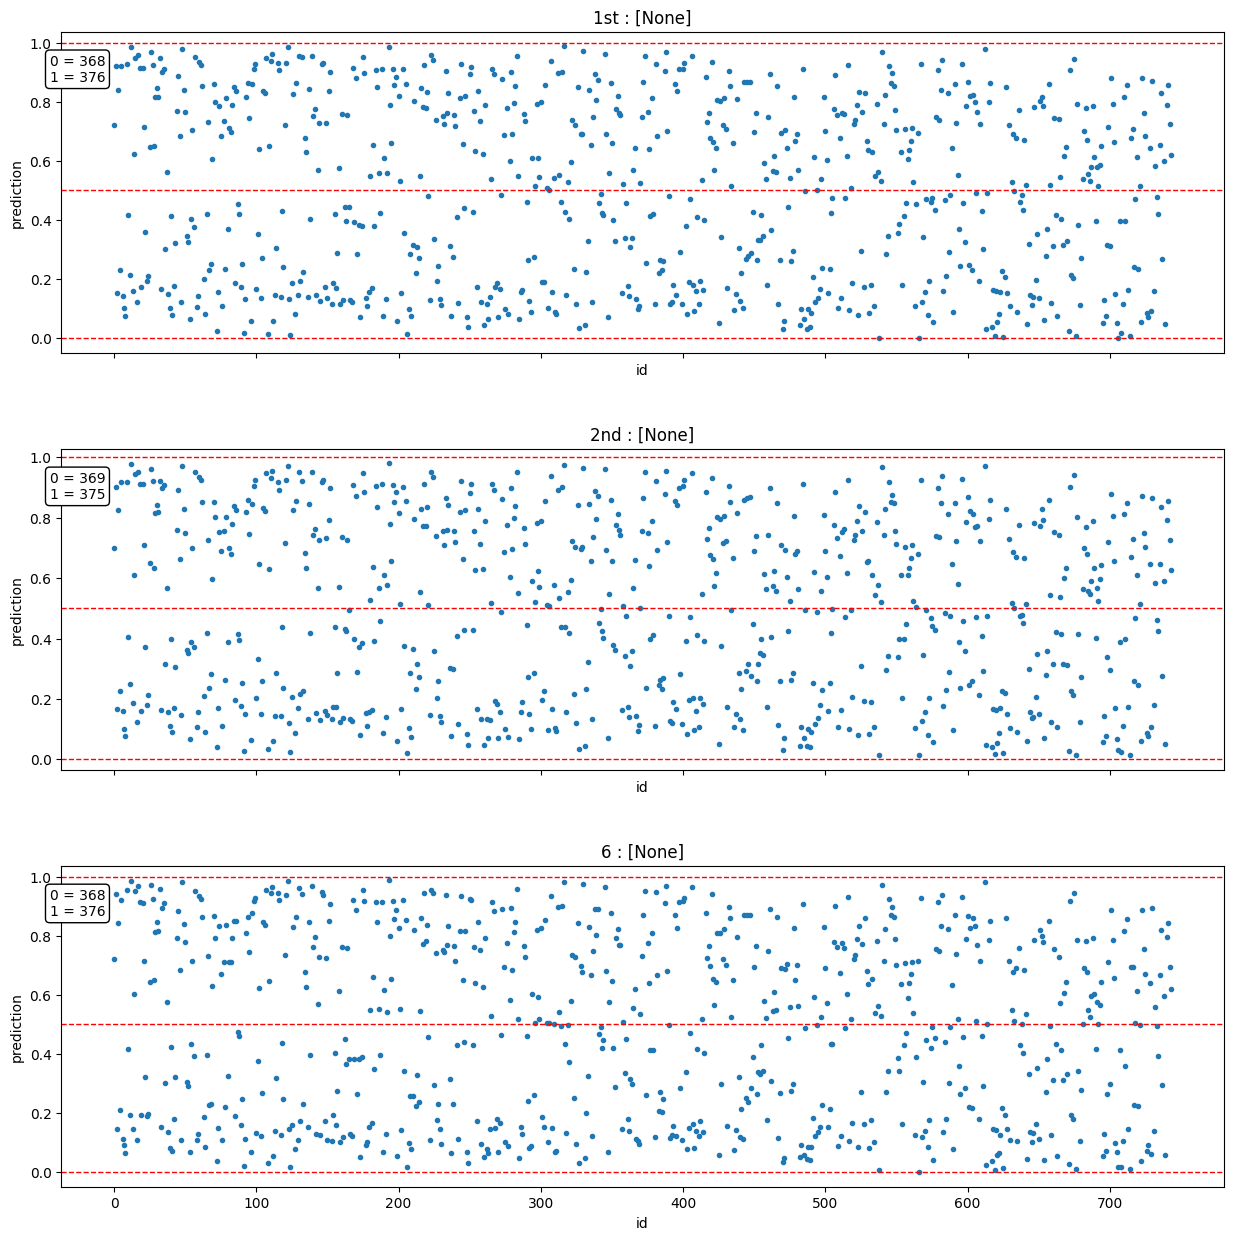

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_files = [
    '/Users/macbookair/Desktop/Project/dkt/project/level2_dkt-recsys-10/ensemble/compare/1st.csv',
    '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/compare/2nd.csv',
    # '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/compare/3.csv',
    # '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/compare/4.csv',
    # '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/compare/5.csv',
    '/opt/ml/project/level2_dkt-recsys-10/ML_models/src/ensemble/compare/6.csv',
]

result = [
    '[0.8137, 0.7527]',
    '[None]',
    '[None]',
    '[None]',
    '[None]',
    '[None]',
]

# 개수를 저장할 리스트
category_counts = []

# CSV 파일 읽어오고 범주별 개수 계산
for file_path in csv_files:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 0.5를 기준으로 1과 0으로 분류하여 개수 계산
    counts = df['prediction'].apply(lambda x: 1 if x >= 0.5 else 0).value_counts()
    
    # 개수를 리스트에 추가
    category_counts.append(counts)

# 시각화
labels = ['0', '1']
colors = ['lightblue', 'lightgreen']



# Subplot 설정
fig, axs = plt.subplots(len(csv_files), 1, figsize=(15, 15), sharex=True, gridspec_kw={'hspace': 0.3})

# CSV 파일 읽어오고 subplot 그리기
for i, file_path in enumerate(csv_files):
    name = file_path.split('/')[-1].replace('.csv','')
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Subplot 위치 설정
    ax = axs[i]
    
    # Subplot 그리기
    ax.plot(df['id'], df['prediction'], marker='o', markersize=3, linestyle='None')
    
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1)
    ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

    ax.set_title(f'{name} : {result[i]}')
    ax.set_xlabel('id')
    ax.set_ylabel('prediction')

    # 텍스트로 0과 1의 값을 표시
    count_0 = len(df[df['prediction'] <= 0.5])
    count_1 = len(df[df['prediction'] > 0.5])
    ax.text(-0.01, 0.93, f'0 = {count_0}\n1 = {count_1}', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# 그래프 출력
#plt.tight_layout()
plt.show()
